# **Análisis exploratorio y estadística**
# AE03 - Introducción a conceptos de correlación y métodos de clustering


En este notebook  tenemos por objetivo reforzar las visualizaciones desarrolladas en los notebook anteriores. Sin embargo, en este vamos a desarrollar algunos conceptos adicionales.


Como punto de partida importaremos nuestras 4 librerías.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='blue'>**Leyendo los datos**</font>

El código está adaptado para poder leer desde google drive, sin emabargo se puede modificar la ruta si es que se quiere trabajar en forma local. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/'

trainFile = 'titanic_train.csv'

In [ ]:
#cargar archivo
train_df = pd.read_csv(path + trainFile)


## <font color='blue'>**Nuestra estadística descriptiva**</font>

1. Survival: Sobreviviente		0 = No, 1 = Si
2. Pclass: La clase del ticket	1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	Sexo	
4. Age: Edad en años
5. Sibsp:	Número de hermanas / cónyuges a bordo del Titanic
6. Parch:	Número de padres / hijos a bordo del Titanic
7. Ticket:	Número del ticket
8. Fare:	Tarifa de pasajero
9. Cabin: Número de cabina
10. Embarked: Puerto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
#selección de 5 primeros datos del dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#seleccion aleatoria de 5 muestras del dataframe
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


In [ ]:
#estadisticos basicos del dataframe
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Qué puede decir de los distintos atributos? Cómo es la media y la mediana? Existe mucha diferencia entre ellas en algunas variables, por ejemplo **Survived**? Qué significa eso?

In [ ]:
#analizar tipo de datos
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color='blue'>**Análisis categórico**</font>

### Survival

In [ ]:
c_palette = ['tab:blue', 'tab:orange']

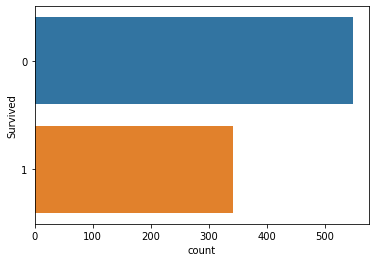

In [ ]:
sns.countplot(y='Survived', data=train_df, palette=c_palette)
plt.show()

### Sex

Exploremos el sexo, pero agregando la codición de si sobrevició o no. Sobrevivientes por sexo:

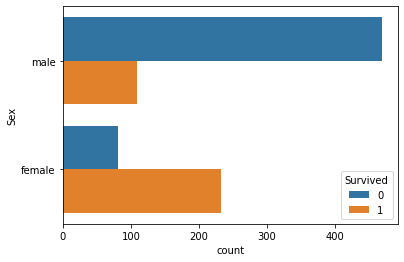

In [ ]:
sns.countplot(y='Sex',hue='Survived', data=train_df, palette=c_palette)
plt.show()

En proporción sobrevivieron más mujeres que hombres. Sin embargo, es interesante explorar si esto se mantuvo bajo otras condiciones como por ejemplo donde embarcó o la clase en la que viajaba el pasajero.

## <font color='green'>**Actividad 1**</font>

Realice el mismo ejercicio anterior pero considere la variable **Embarked** y **Pclass**, siga diferenciando la visualización por la variable Survived.

Qué conclusión puede generar?

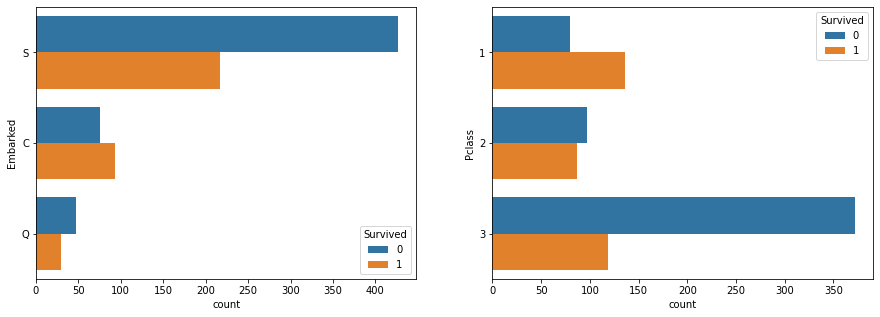

In [ ]:
# Tu código aquí ...

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(y='Embarked',hue='Survived', data=train_df, palette=c_palette, ax = ax[0])
# plt.show()

sns.countplot(y='Pclass',hue='Survived', data=train_df, palette=c_palette, ax = ax[1])

plt.show()


**_Conclusión_**: La gente que embarco en S tuvo un mayor indice de fallecer en el accidente (casi lo duplica). Solo el embarque en C aseguraba tener una mayor tasa de supervivencia. Con respecto a la variable "clase", los pasajeos de primera clase tenian mucho más probabilidad de sobrevivir, en la segun clase estaban practicamente neteados entre sobrevivir y morir (practicamente tirar una moneda al aire y tener 50-50 de probabilidad). Finalmente, en la tercera clase las probabilidades de morir eran de alredor de 3 veces las de sobrevirir.


Combinando ambas desagregaciones, un pasajero que estaba en tercera clase y habia embarcado en "S" tendria una alta probabilidad de muerte, por el contrario, un pasajero de primera clase y que embarco en "C" tenia las mejores probabilidades de sobrevivir en todo el barco.

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Análisis cuantitativo**</font>

### Age

In [ ]:
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange','tab:green']

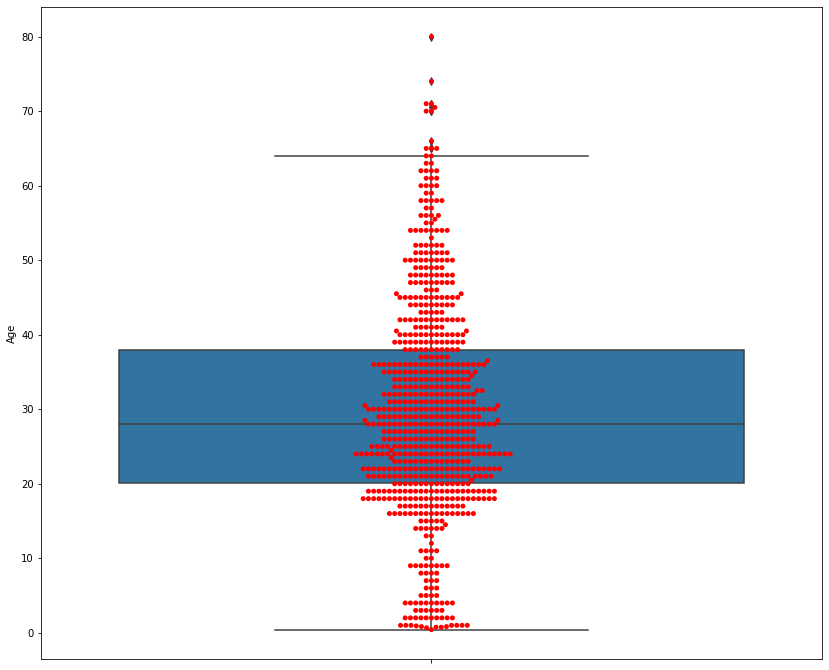

In [ ]:
# Analisis univariado. 
plt.figure(figsize=(14,12)) # Agrandamos la figura para hacerla más clara
sns.boxplot(y='Age', data=train_df,palette=c_palette)
sns.swarmplot(y='Age', data=train_df,color='r')
plt.show()

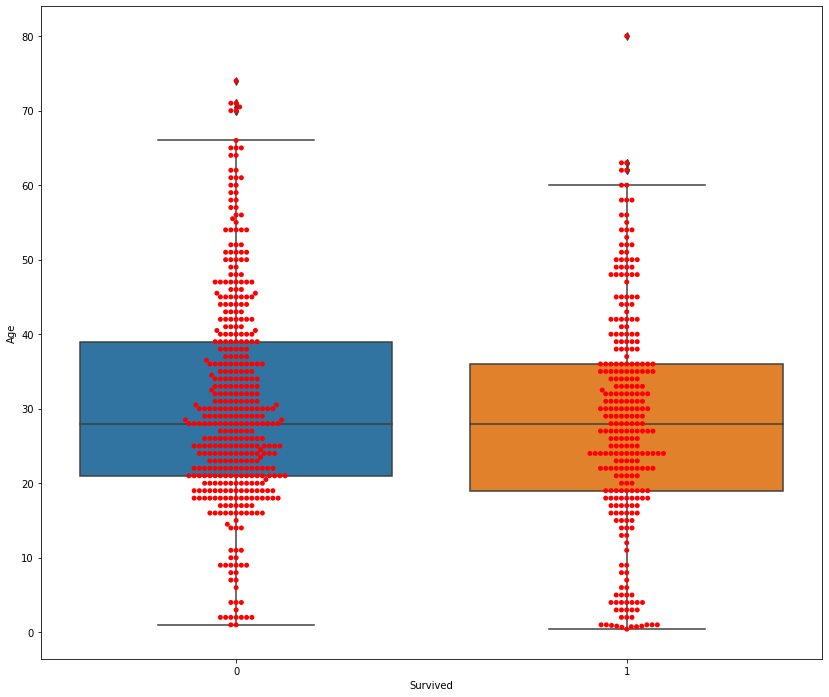

In [ ]:
# Exploremos la edad pero considerando adicionalmente Survived
plt.figure(figsize=(14,12)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette)
sns.swarmplot(x='Survived', y='Age', data=train_df, color='r')
plt.show()

Visualmente no se observa que existió una diferencia marcada por la edad entre los sobrevivientes y los que no. 

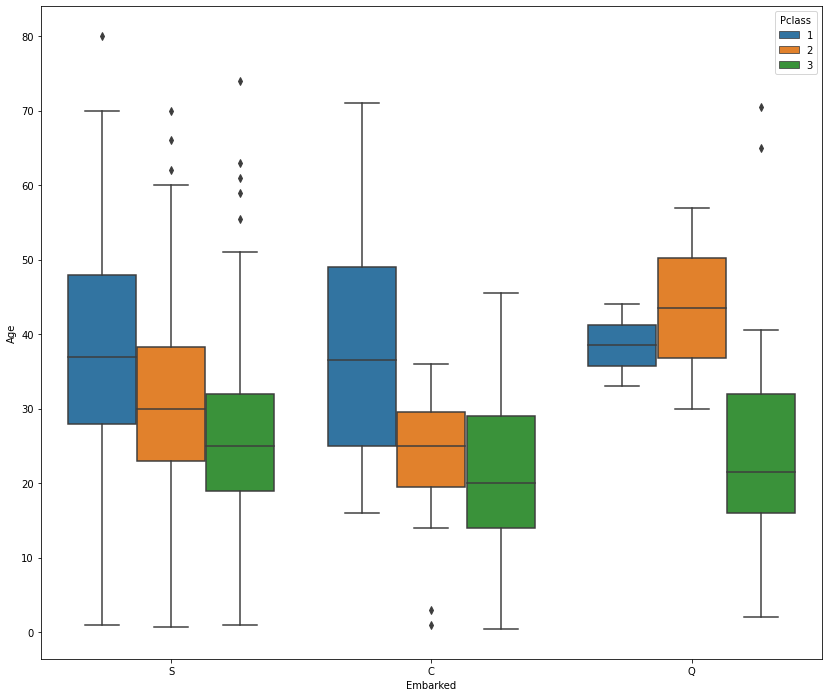

In [ ]:
# Incoproremos la clase y el embarque para ver si existe relacion entre la edad y estas variables. 
plt.figure(figsize=(14,12))
sns.boxplot(x='Embarked', y='Age', hue='Pclass', 
            data=train_df, palette=c_palette3)
plt.show()

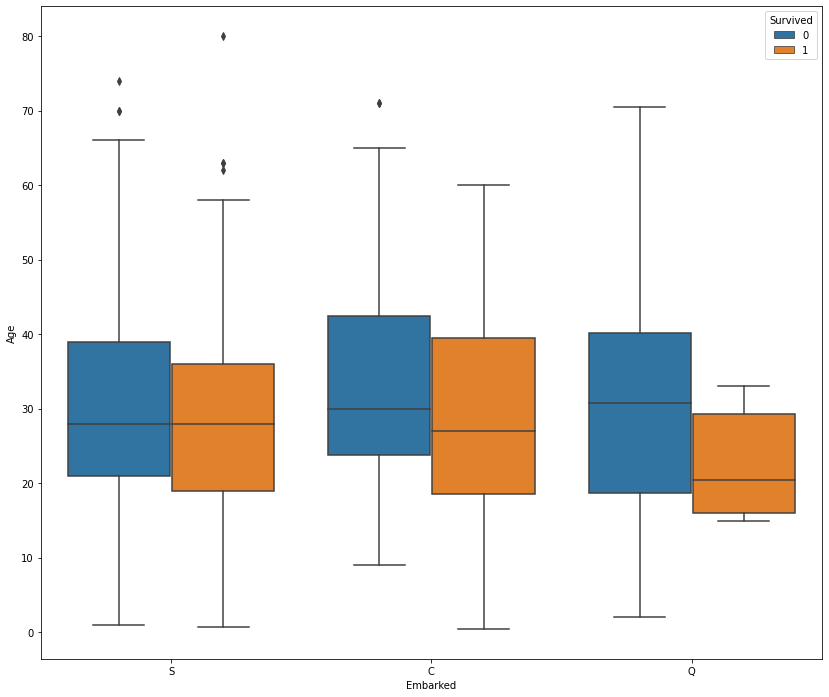

In [ ]:
# Analicemos la relacion entre Embarked, Age y Survived. 
plt.figure(figsize=(14,12))
sns.boxplot(x='Embarked', y='Age', hue='Survived', 
            data=train_df,palette=c_palette)
plt.show()

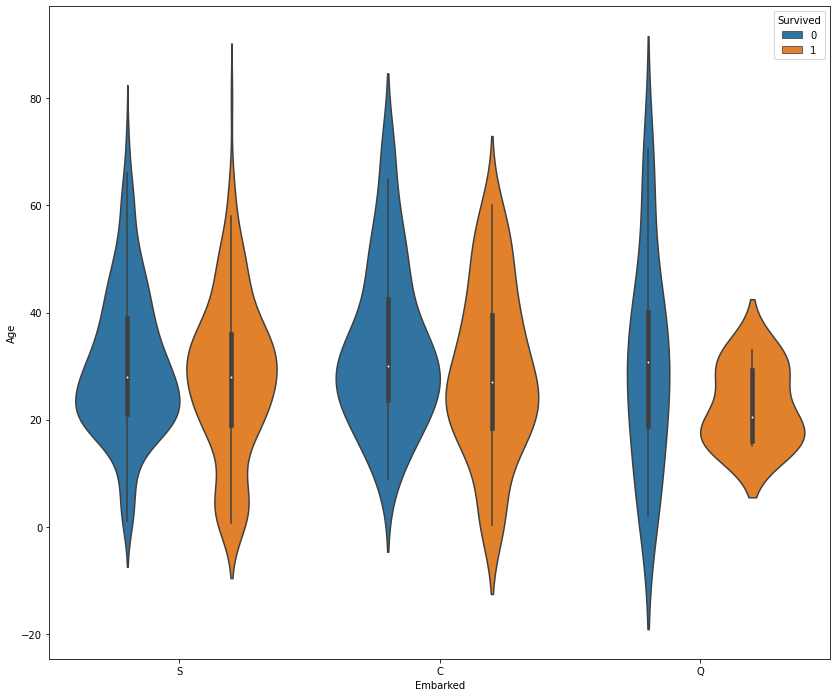

In [ ]:
# Analicemos la relacion entre Embarked, Age y Survived. 
plt.figure(figsize=(14,12))
sns.violinplot(x='Embarked', y='Age', hue='Survived', 
            data=train_df,palette=c_palette)
plt.show()

## <font color='green'>**Actividad 2**</font>

Compara a través de un box plot cómo es la dependencia entre la variable Parch, que representa el número de padres o hijos que viajaban respecto de si sobrevivió o no. Realice el mismo análisis para SibSp.

Incorpore también un _swarmplot_ para entender la cantidad de puntos relacionados.

Qué conclusión puede generar?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


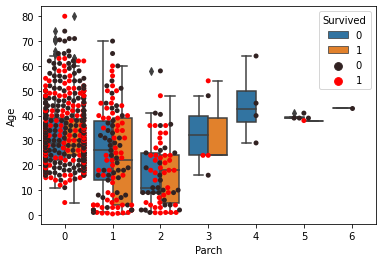

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


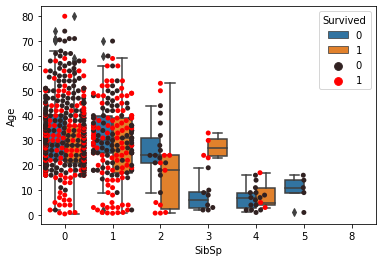

In [ ]:
# Tu código aquí ...
sns.boxplot(x='Parch', y='Age', hue='Survived',
            data=train_df,palette=c_palette)
sns.swarmplot(x='Parch', y='Age', hue='Survived', data=train_df,color='r')
plt.show()

sns.boxplot(x='SibSp', y='Age', hue='Survived',
            data=train_df,palette=c_palette)
sns.swarmplot(x='SibSp', y='Age', hue='Survived', data=train_df,color='r')
plt.show()

# plt.figure(figsize=(14,12)) # Agrandamos la figura para hacerla más clara
# sns.boxplot(y='Age', data=train_df,palette=c_palette)
# sns.swarmplot(y='Age', data=train_df,color='r')
# plt.show()


In [ ]:
train_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


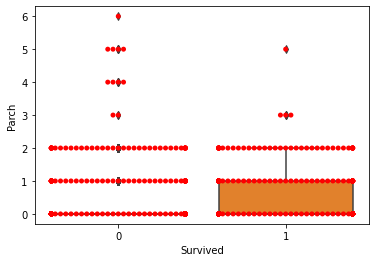

In [ ]:
sns.boxplot(y='Parch', x='Survived', 
            data=train_df,palette=c_palette)
sns.swarmplot(y='Parch', x='Survived', data=train_df,color='r')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


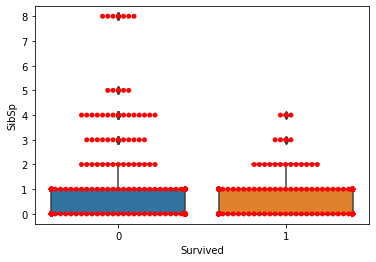

In [ ]:
sns.boxplot(y='SibSp', x='Survived', 
            data=train_df,palette=c_palette)
sns.swarmplot(y='SibSp', x='Survived', data=train_df,color='r')
plt.show()

**_Conclusión_**: Entre los pasajeros que sobrevivieron, aquellos que viajon acompañados de sus padres y/o hermanos tuvieron mayor sobrevivencia que los pasajeros que viajaron solos. Sin embargo, la tendencia no es tan claro como otras variables explicativas dada la gran incertidumbre en las estimaciones. 

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Análisis de correlación**</font>

Vamos a entender como es la correlación entre las distintas variables. En este caso utilizaremos la **correlacion de Pearson**. La correlación de Pearson mide la relación lineal entre dos variables. Su valor se mueve entre $[-1, 1]$, donde 1 representa una correlacion lineal perfecta y en el caso de -1, una correlacion invesa lineal perfecta. 

La definicion forma es:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$

Donde 

$$cov(X,Y) = \frac{\mathop{\mathbb{E}}[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

In [ ]:
# Eliminamos las variables categoricas
corr_df = train_df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
corr_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# Hay NaN, los rellenamos con la moda
corr_df['Age'] = corr_df['Age'].fillna(value=corr_df['Age'].mode()[0])


#en vez de llenar a todos los valores faltantes por la moda, si seccionamos por grupos 
# de ejemplo: a que clase corresponden, llenar con la moda de cada clase

corr_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

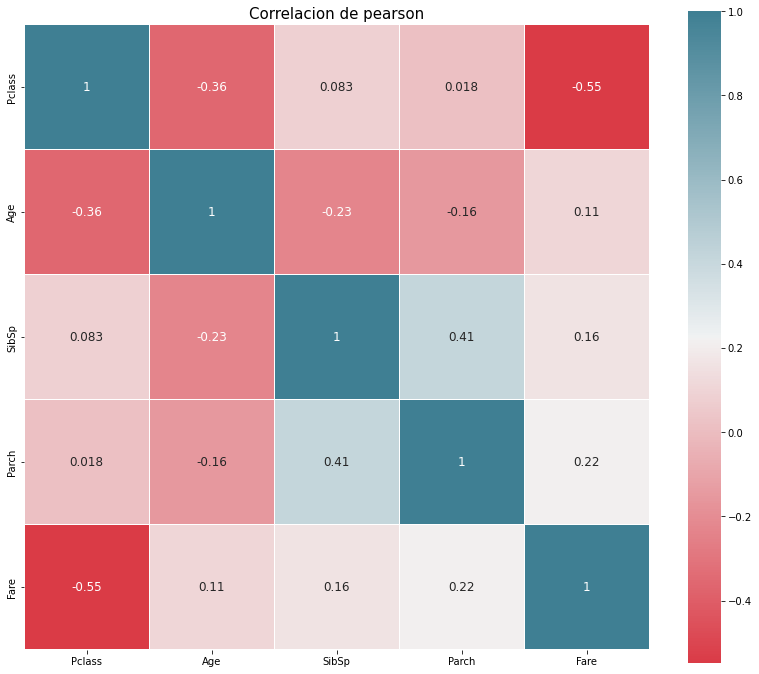

In [ ]:
plt.figure(figsize=(14,12))
plt.title('Correlacion de pearson', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr_df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 }, cmap = colormap)
plt.show()

Qué relación interesante aparece?
Según el profe: Ninguna

## <font color='blue'>**Clustering**</font>

Muchas veces la relación entre una variable dependiente y el conjunto de variables independiente no es evidente. Ya vimos en las visualizaciones anteriores que la sobrevivencia de un pasajero se relacionaba con algunas de las variables del dataset. Pero podemos ir un poco mas allá en este análisis. ¿Podremos encontrar una relación no evidente (Multivariada) entre un conjunto de variables independiente y alguna variable que queramos modelar? como por ejemplo Survived. Para esto iremos un poco mas allá aplicando técnicas de clustering.

### K Means clustering

#### La intuición


K-Means es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de $N$ observaciones en $k$ grupos (o clusters) en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Se suele usar la distancia cuadrática.

Tenemos un conjunto de datos de $N$ individuos, cada uno con un vector M-dimensional asociado que representa $M$ características. Cada entrada en los vectores representa una cantidad numérica diferente. Por ejemplo, cada vector podría representar un hogar individual, con atributos de ingreso, número de automóviles, número de hijos, etc.

El algoritmo consta de tres pasos:

1. __Inicialización:__ una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
2. __Asignación objetos a los centroides:__ cada objeto de los datos es asignado a su centroide más cercano.
3. __Actualización centroides:__ se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.


![Partes](https://drive.google.com/uc?export=view&id=1vGANhhd8DrllEQIyLFdLBDEqTCSvtOKD)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

Utilizaremos la tecnica K-means para identificar a partir del conjunto de variables del dataset si un pasajero sobrevive o no. 

La tecnica K-means funciona en forma adecuada con variables idealmente continuas, por lo tanto vamos a eliminar las variables: ['PassengerId', 'Cabin', 'Name', 'Ticket']

Por otro lado k-means exige que cada celda tenga un valor numerico. Es por eso que en el caso de valores en blanco de Age o Embarked utilizaremos la moda. Y en el caso de sexo tenemos que pasarlo a numerico

In [ ]:
def Procesamiento(dataframe):
    le = LabelEncoder()
    X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0])
    X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0]))
    X['Sex'] = np.where(X['Sex'] == 'male', 1, 0)
    return X

## <font color='green'>**Actividad 3**</font>

Analice la función `Procesamiento`. Particularmente investigue que rol cumple LabelEncoder aplicado a la variable Embarked. Analice la función de pandas get_dummies.

¿Por qué es necesario realizar todo este preprocesamiento?

In [ ]:
# Tu código aquí ...
#ir corriendo esto paso a paso

le = LabelEncoder() #transforma variables categóricas en valores númericos 
X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1) #eliminar columnas no númericas del dataframe
X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0]) #se rellena NaN de la variable 'Age' del dataframe con la moda de la variable 
X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0])) #transforma la variable categorica 'Embarked' (C, M y S) a variables númericas que se asocia a una etiqueta (o label) asociado, que seria 0, 1 y 2
X['Sex'] = np.where(X['Sex'] == 'male', 1, 0) #se convierte la variable categorica 'Sex' a variable binaria 1 (cuando es hombre) y 0 (cuando es mujer).
return X #retorna la matriz X que esta transformada 


<font color='green'>Fin Actividad 3</font>

In [ ]:
#quizas ocupar, train_df_preprocesado como nombre de variable (en vez de samples)
samples = Procesamiento(train_df)

In [ ]:
samples.info()
#todo es integer o floar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
samples.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
291,1,1,0,19.0,1,0,91.0792,0
216,1,3,0,27.0,0,0,7.9250,2
560,0,3,1,24.0,0,0,7.7500,1
584,0,3,1,24.0,0,0,8.7125,0
489,1,3,1,9.0,1,1,15.9000,2


Cuando se utiliza k-means, las variables deben poder ser comparables entre ellas. Para eso debemos normalizar las variables. Exiten muchos metodos de normalizacion pero los más utilizados son MinMaxScaler donde a través de una transformación lineal llevamos el valor más pequeño a 0 y el más grande a 1. Otro método muy utilizado es StandarScaler donde nuestra población la llevamos a media 0 y desviacion standar de 1.

En este caso para hacer comparables las variables utilizaremos StandarScaler.

Adicionalmente en k-means se debe definir la cantidad de cluster iniciales; para esto utilizaremos una grafica a través de una medida denominada `Inertia`. 

`Inertia` mide qué tan bien se agrupa un conjunto de datos mediante K-Means. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un grupo.

Un buen modelo es uno con baja inercia  un número bajo de grupos (K). Sin embargo, esto es una compensación porque a medida que aumenta K, la inercia disminuye.

Para encontrar el K óptimo para un conjunto de datos, use el método `Elbow`(`Codo`); Encuentre el punto donde la disminución de la inercia comienza a disminuir. K = 2 es el "codo" de este gráfico.

Inertial of clusters:  143.637126732166


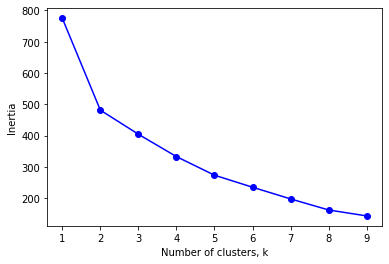

In [ ]:
scaler = preprocessing.MinMaxScaler()

samples = scaler.fit_transform(samples)
ks = range(1,10)
inertias = []

for k in ks:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(samples)
    inertias.append(k_mean.inertia_)

plt.plot(ks, inertias, '-o', c = 'b')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
print('Inertial of clusters: ', k_mean.inertia_)
plt.show()

## <font color='green'>**Actividad 4**</font>

Investigue sobre el método del Codo. Por qué en este caso se definió un K = 2?

<font color='green'>Fin Actividad 4</font>

In [ ]:
samples = Procesamiento(train_df)

scaler = preprocessing.MinMaxScaler()
K = 2
k_mean = KMeans(n_clusters=K)

sample_train,sample_val, gt_train, gt_val = train_test_split(samples,
                                                             train_df['Survived'],
                                                             test_size=0.2, random_state=99)

pipeline = make_pipeline(scaler, k_mean)
pipeline.fit(sample_train)
labels = pipeline.predict(sample_val)
print('Inertial of clusters: ', k_mean.inertia_)

Inertial of clusters:  382.939876971403


_Respuesta_ : Por que el decaimiento al comienzo es fuerte (la pendiente), y luego el decaimiento es menor que de 1 cluster a 2 cluster. Cuando se "estabiliza" esa pendiente o disminuye su decrecimiento, se considera que se han incluido los suficientes clusters para el analisis. 

### Matriz de confusión

Cómo evaluamos que el modelo construído funcione en forma aceptable? Cuando el problema es de clasificacion aparece el concepto de matriz de confusión. 

![Confusión](https://drive.google.com/uc?export=view&id=11X8idteIBlAntMOeZCTFnfSMgnzLEa0V)



__Verdaderos positivos (TP)__: los casos en los que el clasificador predijo 1 y el valor verdadero es 1.<br>
__Negativos verdaderos (TN)__: los casos en los que el clasificador predijo "0" y el valor real es 0.<br>
__Falsos positivos (FP)__: los casos en los que el clasificador predijo 1 pero  el valor real era 0. Esto es lo que en estadística se conoce como __error tipo I__.<br>
__Falsos negativos (FN)__: los casos en los que el clasificador predijo 0, pero el valor real era 1. Esto es lo que en estadística se conoce como __error tipo II__.

Sobre esta matriz de confusión se definen varios indicadores donde los principales son:

1. __Recall__ (recuperación o sensibilidad): La ecuación siguiente se puede explicar diciendo, de todas las clases positivas, cuántas predijimos correctamente. La recuperación debe ser lo más alta posible.

$$ recall = \frac{TP}{TP+FN}$$

2. __Precision__: La ecuación siguiente  se puede explicar diciendo, de todas las clases que hemos predicho como positivas, cuántas son realmente positivas. La precisión debe ser lo más alta posible.

$$ Precision =  \frac{TP}{TP+FP}$$

3. __Accuracy__ (exactitud): De todas las clases (positivas y negativas), cuántas de ellas hemos predicho correctamente. En este caso, será 4/7. Se refiere a lo cerca que está el resultado de una medición del valor verdadero. En términos estadísticos, la exactitud está relacionada con el sesgo de una estimación.

![Precision-Recall](https://drive.google.com/uc?export=view&id=16wM132gIy9taOOA3UrEodtzYIEliBb3P)


$$ Accuracy =  \frac{TP + TN}{P + N}$$

4. __F-Score__ (F1): Es difícil comparar dos modelos con baja precisión y alta recall o viceversa. Entonces, para hacerlos comparables, usamos F-Score. F-score ayuda a medir el recall y la precisión al mismo tiempo. Utiliza la media armónica en lugar de la media aritmética al castigar más los valores extremos. Además, en las fracciones es el numerador el que tiene el mismo valor, por lo tanto es mucho más natural compararlo a través de él....es decir una media armonica. 

$$ F1 = 2* \frac{recall*precision}{recall + precision}$$



In [ ]:
ct_df = pd.DataFrame({'labels': labels, 'survived': gt_val})
# create crosstb
ct = pd.crosstab(ct_df['labels'], ct_df['survived'])
print(ct)

survived    0   1
labels           
0         112   9
1           1  57


In [ ]:
ct[1][1]

57

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(gt_val, labels)

array([[112,   1],
       [  9,  57]])

In [ ]:
print(metrics.classification_report(gt_val, labels))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.98      0.86      0.92        66

    accuracy                           0.94       179
   macro avg       0.95      0.93      0.94       179
weighted avg       0.95      0.94      0.94       179



In [ ]:
#Calcular indicadores de forma "manual"

TP = ct[1][1]
TN = ct[0][0]
FP = ct[0][1]
FN = ct[1][0]
print(FP)

recall_val    = TP/(TP + FN)
recall_val_0  = TN/(TN + FP)
precision_val = TP/(TP + FP)
accuracy_val  = (TP + TN)/(TP + TN + FP + FN)
F1_val        = 2*(recall_val*precision_val)/(recall_val + precision_val)

print(recall_val_0)

print(f'Recall    metric is  {np.round(recall_val,2)}')
print(f'Precision metric is  {np.round(precision_val,2)}')
print(f'Accuracy  metric is  {np.round(accuracy_val,2)}')
print(f'F-Score   metric is  {np.round(F1_val,2)}')


1
0.9911504424778761
Recall    metric is  0.86
Precision metric is  0.98
Accuracy  metric is  0.94
F-Score   metric is  0.92


### Consejos generales sobre La matriz de confusión y sus métricas :
1. La __~precisión~Exactitud__ es un gran estadístico, Pero es útil únicamente cuando se tienen “datasets” simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

2. El indicador __F1__ de la matriz de confusión es útil si se tiene una distribución de clases desigual.

3. Elija mayor __precisión__ para conocer qué tan seguro está de los verdaderos positivos, Mientras que la __sensibilidad__ o  __“Recall”__ le servirá para saber si no está perdiendo positivos.

4. Las Falsas Alarmas: por ejemplo, si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall), cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas). Un ejemplo de esto es:  Prefieres que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

5.  Elija __precisión__ (precision en inglés) si quiere estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

6. Elija alta __especificidad__:  si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores y las pruebas de alcoholemia. Un ejemplo de esto es: Se está llevando a cabo una prueba de drogas en la que todas las personas que dan positivo irán a la cárcel de inmediato, la idea es que ninguna persona “libre de drogas” vaya a la cárcel. Los falsos positivos aquí son intolerables.

